# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [1]:
import numpy as np # необходимые библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("adult.data.csv",sep =',', header = None,
                 names=["age", "workclass", "fnlwgt", "education", "education-num", 
                        "marital-status", "occupation", "relationship", "race", "sex",
                        "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [4]:
dfm = (df[df['sex'] == 'Male']) # создадим датафрейм где все объекты мужчины (будет использован в дальнейшем)
dfw = (df[df['sex'] == 'Female']) # датафрейм для женщин

In [5]:
print('Мужчин:', len(dfm))

Мужчин: 21790


In [6]:
print('Женщин:' ,len(dfw))

Женщин: 10771


### Вопрос 2
Каков средний возраст мужчин?


In [7]:
dfm.age.mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [8]:
df_usa = (df[df['native-country'] == 'United-States'])

In [9]:
len(df_usa)/len(df)

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

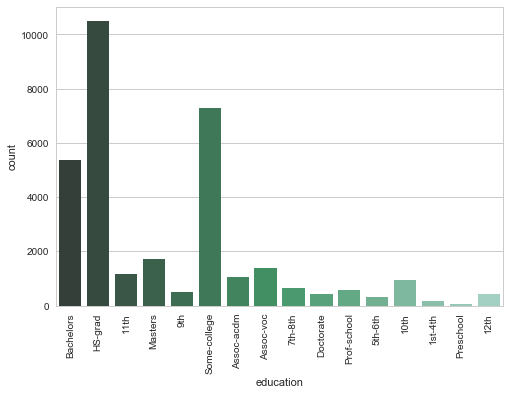

In [10]:
sns.set_style("whitegrid")
p = sns.countplot(x="education", data=df, palette="BuGn_d")
for item in p.get_xticklabels():
    item.set_rotation(90)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [11]:
df_div = df[df['marital-status'] == 'Divorced']

In [12]:
print('Среднее:', df_div.fnlwgt.mean())

Среднее: 185802.79045689848


In [13]:
print('Стандартное отклонение:', df_div.fnlwgt.std())

Стандартное отклонение: 105646.78945933603


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [14]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [15]:
df_50K = df[df['50K'] == '>50K']

In [16]:
df_50K['education'].isin(['Bachelors', 'Masters', 'Doctorate'  ]).value_counts()

False    4355
True     3486
Name: education, dtype: int64

По данным выше, среди тех, кто зарабатывает более 50 тыс., людей без высшего образования (4355 чел.) больше, чем людей с высшим образованием (3486 чел.)

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [17]:
df.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [18]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [19]:
print('Из стран из списка ниже:')
df[df['occupation'] == 'Farming-fishing']['native-country'].unique()

Из стран из списка ниже:


array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [20]:
print('количество мужчин-бакалавров к количеству мужчин-магистров:')
print(len(dfm[dfm['education'] == 'Bachelors'])/len(dfm[dfm['education'] == 'Masters']))

количество мужчин-бакалавров к количеству мужчин-магистров:
3.14743049705139


In [21]:
print('количество женщин-бакалавров к количеству женщин-магистров:')
print(len(dfw[dfw['education'] == 'Bachelors'])/len(dfw[dfw['education'] == 'Masters']))

количество женщин-бакалавров к количеству женщин-магистров:
3.0205223880597014


Первое значение больше

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [22]:
print('максимальное количество рабочих часов в неделю:', max(df['hours-per-week']))

максимальное количество рабочих часов в неделю: 99


In [23]:
print(len(df[df['hours-per-week'] == 99]), 'людей работают столько часов в неделю')

85 людей работают столько часов в неделю


In [24]:
print('их заработок:')
df[df['hours-per-week'] == 99]['50K'].value_counts()

их заработок:


<=50K    60
>50K     25
Name: 50K, dtype: int64